Missing values:
 Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


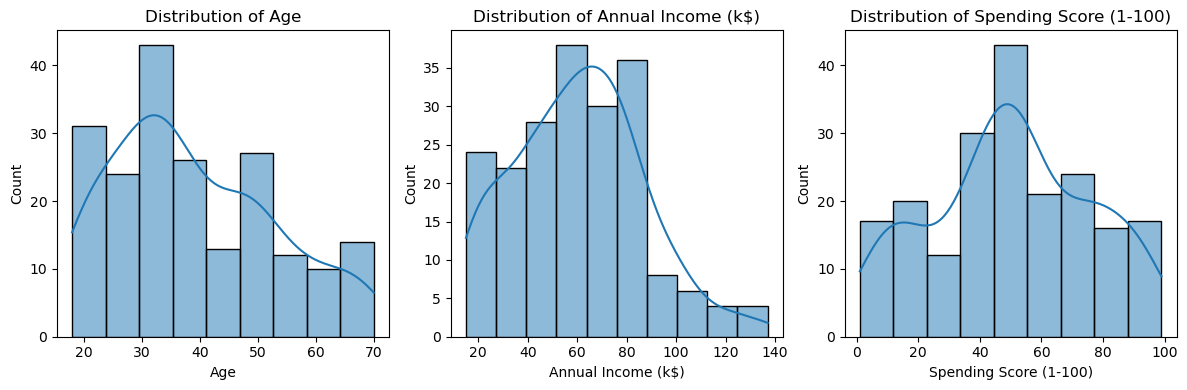

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

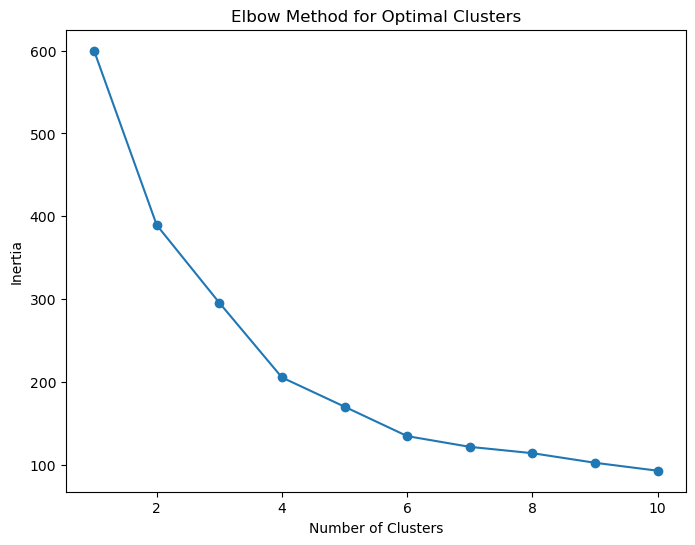

C:\Users\visha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\visha\AppData\Local\Temp\ipykernel_23064\3233905146.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


Silhouette Score: 0.41


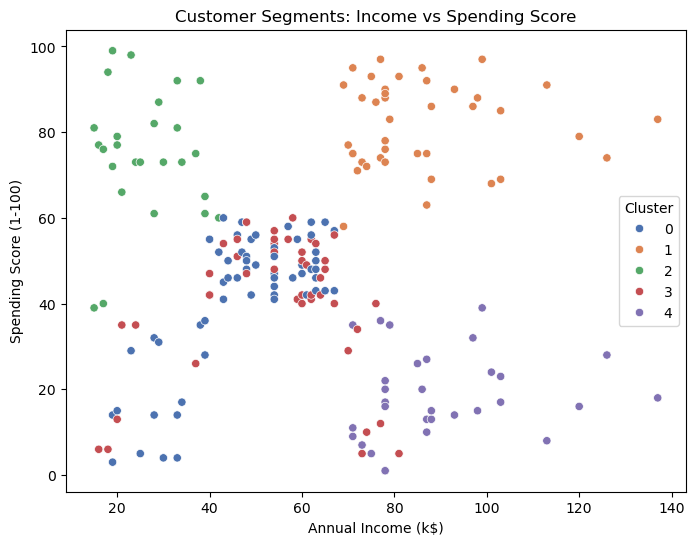

Cluster Characteristics:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
Clustered data saved as 'clustered_customers.csv'


In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Mall Customer dataset
data = pd.read_csv('Mall_Customers.csv')  # Ensure this file is in the same folder
df = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Exploratory Data Analysis: Visualize feature distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Apply K-Means with optimal clusters (e.g., k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Evaluate clustering using Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.2f}")

# Visualization: Clusters in Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='deep')
plt.title('Customer Segments: Income vs Spending Score')
plt.show()

# Analyze cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Characteristics:\n", cluster_summary)

# Save the clustered dataset
df.to_csv('clustered_customers.csv', index=False)
print("Clustered data saved as 'clustered_customers.csv'")